<h2> kütüphaneleri kurma işlemi </h2>

In [ ]:
import os
import shutil
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [48]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 746.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 3.1 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.3/322.3 kB 3.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated pac

In [26]:
pip install opencv-contrib-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 MB 4.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 4.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<h1> 1. Veri Setini Hazırlama </h1>

In [30]:
base_path = "Animals_with_Attributes2/JPEGImages/"

class_names = os.listdir(base_path)
print(f"Toplam {len(class_names)} sınıf bulundu.")
print("İlk 5 sınıf:", class_names[:5])


Toplam 50 sınıf bulundu.
İlk 5 sınıf: ['hippopotamus', 'gorilla', 'rhinoceros', 'raccoon', 'humpback+whale']


-base_path: "Animals_with_Attributes2/JPEGImages/" klasör yolu, veri setinin bulunduğu temel klasörün yolunu temsil eder. Bu klasör, her bir hayvan sınıfına ait görüntülerin alt klasörler halinde düzenlendiği yerdir.

-os.listdir(base_path) Fonksiyonu: Bu fonksiyon, belirtilen klasördeki tüm dosya ve klasör isimlerini bir liste olarak döndürür. Burada, her bir hayvan sınıfına ait klasör isimleri bu listeye eklenir ve class_names değişkeninde tutulur.

-len(class_names) İle Toplam Sınıf Sayısı: len() fonksiyonu, listede kaç öğe olduğunu hesaplar ve toplam sınıf sayısını verir.

-print() İle Çıktı Gösterimi: print(f"Toplam {len(class_names)} sınıf bulundu."): Veri setinde kaç adet sınıf bulunduğunu yazdırır. print("İlk 5 sınıf:", class_names[:5]): İlk 5 sınıf ismini liste olarak yazdırır. 

<h2> 10 sınıfa ait görselleri ayırma </h2>

In [33]:
filtered_path = "Animals_with_Attributes2/FilteredDataset/"
os.makedirs(filtered_path, exist_ok=True)

selected_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 
                    'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']

for class_name in selected_classes:
    source_folder = os.path.join(base_path, class_name)
    target_folder = os.path.join(filtered_path, class_name)
    os.makedirs(target_folder, exist_ok=True)
    for i, file_name in enumerate(os.listdir(source_folder)):
        if i < 650:  # İlk 650 görsel
            shutil.copy(os.path.join(source_folder, file_name), target_folder)

print("Seçilen sınıflar başarıyla ayıklandı ve FilteredDataset klasörüne kopyalandı.")


Seçilen sınıflar başarıyla ayıklandı ve FilteredDataset klasörüne kopyalandı.


-filtered_path Tanımlaması: filtered_path değişkeni, seçilen sınıfların görsellerinin kopyalanacağı klasörün yolunu belirler. Burada "Animals_with_Attributes2/FilteredDataset/" klasörü oluşturulur.

-os.makedirs(filtered_path, exist_ok=True): Belirtilen klasör yoksa oluşturur. Eğer klasör zaten mevcutsa bir hata vermez (exist_ok=True).

-Seçilen Sınıflar: selected_classes listesi, projede kullanılacak hayvan sınıflarını içerir. Veri setindeki klasör isimleriyle tam uyumlu olmalıdır (örneğin, giant panda yerine giant+panda).

-for Döngüsü ile Sınıf Ayıklama: Döngü, selected_classes listesindeki her bir sınıf için çalışır.

-source_folder ve target_folder: source_folder: Seçilen sınıfın orijinal klasörünü temsil eder. target_folder: Seçilen sınıfa ait görüntülerin kopyalanacağı klasörü temsil eder. Her iki klasör os.path.join() ile birleştirilir.

İlk 650 Görselin Kopyalanması

-enumerate(os.listdir(source_folder)): Orijinal klasördeki dosyaları tek tek listeler ve numaralandırır.

-if i < 650:: İlk 650 görüntü seçilir. Böylece veri dengesi sağlanır.

-shutil.copy: Seçilen görüntüleri orijinal klasörden çıktı klasörüne kopyalar.

<h2> görsellerin boyutlandırılması ve normalize edilmesi </h2>

In [59]:
image_size = (128, 128)

images = []
labels = []
label_map = {class_name: idx for idx, class_name in enumerate(selected_classes)}

for class_name in selected_classes:
    class_folder = os.path.join(filtered_path, class_name)
    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)
        # Görseli oku ve boyutlandır
        img = cv2.imread(file_path)
        img_resized = cv2.resize(img, image_size)
        img_normalized = img_resized / 255.0  # Normalize et
        images.append(img_normalized)
        labels.append(label_map[class_name])

images = np.array(images)
labels = np.array(labels)

print(f"Toplam görsel sayısı: {images.shape[0]}")
print(f"Görsellerin boyutu: {images.shape[1:]}")  # Her görselin boyutunu göster


Toplam görsel sayısı: 6500
Görsellerin boyutu: (128, 128, 3)


Hedef Boyutun Belirlenmesi

-image_size = (128, 128): Görseller, CNN modelinin giriş boyutuna uygun hale getirilmek üzere 128x128 piksel boyutunda yeniden boyutlandırılacaktır.

Veri Yapılarının Hazırlanması

-images: İşlenmiş (boyutlandırılmış ve normalize edilmiş) görselleri depolamak için bir liste.

-labels: Her görselin sınıf etiketini tutmak için bir liste.

-label_map: Sınıf isimlerini (ör. collie) sınıf indeksine (ör. 0) eşleyen bir sözlük oluşturur.

Görsellerin Okunması ve İşlenmesi

-for döngüsü: Her bir sınıfın görüntü klasöründeki dosyaları sırayla işler.

-cv2.imread(file_path): Görseli belirtilen dosya yolundan okur.

-cv2.resize(img, image_size): Görseli 128x128 boyutuna yeniden boyutlandırır.

-img_resized / 255.0: Piksel değerlerini [0, 255] aralığından [0, 1] aralığına ölçekleyerek normalize eder. İşlenmiş görsel, images listesine eklenir. Görsele ait sınıf etiketi, labels listesine eklenir.

NumPy Dizilerine Dönüştürme

-images = np.array(images): İşlenmiş tüm görseller bir NumPy dizisine dönüştürülür.

-labels = np.array(labels): Etiketler bir NumPy dizisine dönüştürülür.

Çıktı Gösterimi

-images.shape[0]: Toplam görsel sayısını döndürür.

-images.shape[1:]: Her bir görselin boyutunu (ör. (128, 128, 3)) gösterir.


<h2> görsellerin %70'ini eğitim, %30'unu test verisi olarak ayırma </h2>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

print(f"Eğitim veri boyutu: {X_train.shape}, Etiket boyutu: {len(y_train)}")
print(f"Test veri boyutu: {X_test.shape}, Etiket boyutu: {len(y_test)}")


Eğitim veri boyutu: (4550, 128, 128, 3), Etiket boyutu: 4550
Test veri boyutu: (1950, 128, 128, 3), Etiket boyutu: 1950


Veri Setini Eğitim ve Test Olarak Ayırma: train_test_split(images, labels, test_size=0.3, random_state=42)

-train_test_split: Verileri eğitim ve test seti olarak böler.

-images: Görsellerin tamamı.

-labels: Görsellerin sınıf etiketleri.

-test_size=0.3: Verilerin %30'u test setine, %70'i eğitim setine ayrılır.

-random_state=42: Her çalıştırmada aynı veri bölme işlemi yapılmasını sağlar, böylece sonuçlar tekrar edilebilir olur.

Değişkenler:

-X_train: Eğitim için kullanılacak görseller.

-X_test: Test için kullanılacak görseller.

-y_train: Eğitim görsellerinin sınıf etiketleri.

-y_test: Test görsellerinin sınıf etiketleri.

-Verilerin Boyutlarını Kontrol Etme:

-X_train.shape: Eğitim görsellerinin boyutlarını (örneğin, (4550, 128, 128, 3)) döndürür.

-len(y_train): Eğitim setindeki toplam etiket sayısını döndürür.

-X_test.shape: Test görsellerinin boyutlarını (örneğin, (1950, 128, 128, 3)) döndürür.

-len(y_test): Test setindeki toplam etiket sayısını döndürür.

-print() Çıktıları: Eğitim ve test setlerindeki görsel ve etiket sayılarının doğru ayrıldığını kontrol etmek için bu çıktılar önemlidir.

<h2> modelin performansını artırmak için veri artırma (augmentation) işlemlerinin yapılması </h2>

In [61]:
datagen = ImageDataGenerator(
    rotation_range=20,          # Rastgele dönüş
    width_shift_range=0.2,      # Genişlikte kaydırma
    height_shift_range=0.2,     # Yükseklikte kaydırma
    shear_range=0.2,            # Kesme
    zoom_range=0.2,             # Yakınlaştırma/Uzaklaştırma
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Eksik pikselleri doldurma
)

datagen.fit(X_train)

print("Veri artırma işlemi tamamlandı.")


Veri artırma işlemi tamamlandı.


ImageDataGenerator Kullanımı: ImageDataGenerator, veri artırma (augmentation) işlemleri için kullanılır. Eğitim verisini çeşitlendirmek için çeşitli görüntü manipülasyonları uygulanır. Bu, modelin genelleme yeteneğini artırır ve overfitting'i önler.

Veri Artırma Parametreleri:

-rotation_range=20: Görseller rastgele ±20 derece döndürülür.

-width_shift_range=0.2: Görseller yatay eksende rastgele %20 oranında kaydırılır.

-height_shift_range=0.2: Görseller dikey eksende rastgele %20 oranında kaydırılır.

-shear_range=0.2: Görsellere rastgele kesme işlemi uygulanır.

-zoom_range=0.2: Görsellere rastgele yakınlaştırma veya uzaklaştırma uygulanır.

-horizontal_flip=True: Görseller yatay eksende rastgele çevrilir.

-fill_mode='nearest': Manipülasyon sonucunda oluşan boş pikseller, en yakın piksel değerleriyle doldurulur.

-datagen.fit(X_train): Eğitim seti üzerinde veri artırma işlemi uygulanır.

Bu işlem, her eğitim adımında verileri gerçek zamanlı olarak manipüle ederek çeşitlendirir.

-Çıktı Mesajı: "Veri artırma işlemi tamamlandı." mesajı, veri artırma işleminin başarıyla tamamlandığını gösterir.


<h1> 2. CNN Modelinin Tasarlanması </1>

In [72]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 sınıf için softmax
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Modelin Yapısı

Model, bir Convolutional Neural Network (CNN) olarak tasarlanmıştır ve aşağıdaki katmanlardan oluşur:

İlk Konvolüsyon Katmanı:

-Conv2D(32, (3, 3), activation='relu'): 32 filtre, 3x3 boyutunda bir çekirdek (kernel) kullanır. ReLU aktivasyon fonksiyonu ile doğrusal olmayan bir dönüşüm uygular.

-Çıkış: (128, 128, 3) giriş boyutu (126, 126, 32) olarak dönüştürülür.

MaxPooling Katmanı:

-MaxPooling2D(pool_size=(2, 2)): Havuzlama işlemi, giriş boyutunu yarıya indirir.

-Çıkış: (63, 63, 32).

Dropout Katmanı:

-Dropout(0.25): Rastgele nöronların %25'ini geçici olarak kapatarak overfitting'i önler.

İkinci Konvolüsyon Katmanı:

-Conv2D(64, (3, 3), activation='relu'): 64 filtre, 3x3 çekirdek kullanır.

-Çıkış: (61, 61, 64).

MaxPooling Katmanı ve Dropout:

-Havuzlama: Çıkış (30, 30, 64).

-Dropout: %25 oranında nöron kapatılır.

Flatten Katmanı:

-Flatten(): Çok boyutlu konvolüsyon çıktısını tek boyutlu bir vektöre dönüştürür.

-Çıkış: (57600).

Tam Bağlantılı (Dense) Katman:

-Dense(128, activation='relu'): 128 nöron ile tam bağlantı sağlar.

-Dropout(0.5): %50 oranında nöron kapatılır.

Çıkış Katmanı:

-Dense(10, activation='softmax'): 10 sınıf için olasılık değerlerini döndürür. Softmax aktivasyonu, her sınıfın toplamı 1 olacak şekilde olasılık dağılımı sağlar.

Modelin Derlenmesi

-Optimizasyon:

-adam: Adaptive Moment Estimation (Adam) algoritması.

Kayıp Fonksiyonu: sparse_categorical_crossentropy: Çok sınıflı sınıflandırma problemleri için uygundur. Etiketler birer tamsayıdır (ör. [0, 1, 2, ..., 9]).

Metrikler: 

-accuracy: Eğitim sırasında doğruluk ölçülür.

Model Özeti
model.summary(): Modelin her katmanının çıktı boyutunu, parametre sayısını ve toplam parametre sayısını özetler.


<h1>4. Modelin Eğitilmesi ve Test Edilmesi</h1>

In [75]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Veri artırma ile eğitim
    validation_data=(X_test, y_test),               # Test verisiyle doğrulama
    epochs=10,                                      # Eğitim epoch sayısı
    verbose=1                                       # Eğitim ilerlemesini göster
)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 52s 357ms/step - accuracy: 0.1316 - loss: 3.0254 - val_accuracy: 0.2990 - val_loss: 2.0604
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 349ms/step - accuracy: 0.2801 - loss: 2.0162 - val_accuracy: 0.3713 - val_loss: 1.8833
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 348ms/step - accuracy: 0.3308 - loss: 1.8804 - val_accuracy: 0.4138 - val_loss: 1.7455
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 349ms/step - accuracy: 0.3666 - loss: 1.7899 - val_accuracy: 0.4282 - val_loss: 1.7559
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 351ms/step - accuracy: 0.3670 - loss: 1.7855 - val_accuracy: 0.4538 - val_loss: 1.5764
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 352ms/step - accuracy: 0.3931 - loss: 1.7163 - val_accuracy: 0.4862 - val_loss: 1.5534
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 349ms/step - accuracy: 0.4104 - loss: 1.6706 - val_accuracy: 0.4969 - val_loss: 1.4869
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 50s 349ms/step - accuracy: 0.4284 - loss: 1.6418 - val

Modelin Eğitilmesi:

-model.fit(): Modeli, belirtilen eğitim verisiyle eğitir. Eğitim sırasında, doğrulama verisi (test seti) kullanılarak modelin her epoch sonunda doğruluk ve kayıp değerleri değerlendirilir.

Parametreler:

-datagen.flow(X_train, y_train, batch_size=32): Eğitim verisine veri artırma (augmentation) uygulanır.

-batch_size=32: Her adımda 32 örnek kullanılarak mini-batch gradyan inişi uygulanır.

-validation_data=(X_test, y_test): Test verisi doğrulama (validation) için kullanılır. Modelin, daha önce görmediği veri üzerinde nasıl performans gösterdiği ölçülür.

-epochs=10: Model, eğitim verisi üzerinde 10 kez tam tur (epoch) çalıştırılır.

-verbose=1: Eğitim ilerleme çubuğunu ve epoch sonuçlarını ekrana yazdırır.

-history Nesnesi: history, eğitim süreci boyunca kaydedilen metrikleri (ör. doğruluk ve kayıp değerleri) tutar.
Bu veriler, eğitim sonrası analiz ve görselleştirme için kullanılır.


<h2>doğruluk ve kayıp değerlerini analiz etmek için eğitim sürecini görselleştirme</h2>

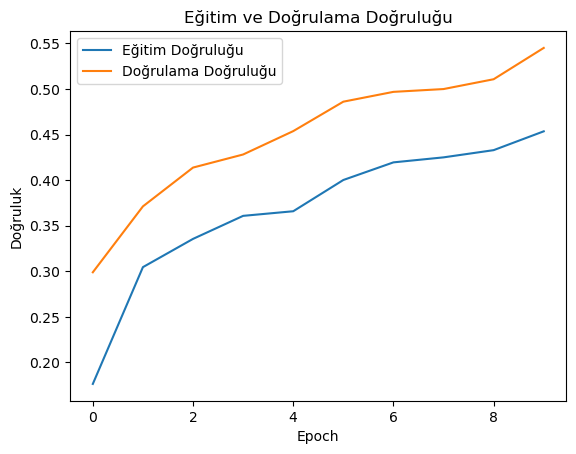

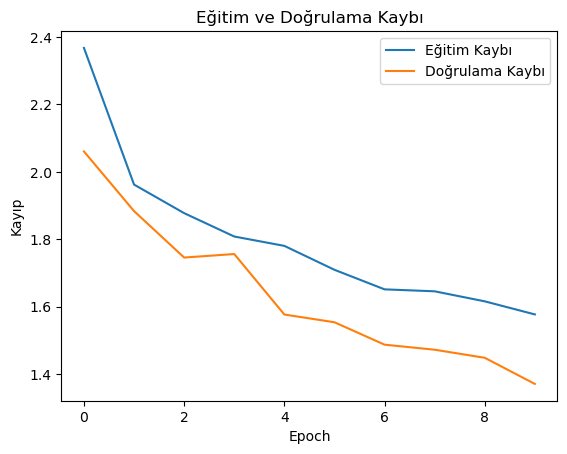

In [77]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


Eğitim ve Doğrulama Doğruluğu Grafiği

-plt.plot(history.history['accuracy']): Modelin her epoch sonunda, eğitim setindeki doğruluğunu (accuracy) çizer.

-plt.plot(history.history['val_accuracy']): Modelin doğrulama (validation) setindeki doğruluğunu (val_accuracy) çizer.

Grafik Detayları:

-xlabel('Epoch'): X ekseninde epoch sayısını gösterir.

-ylabel('Doğruluk'): Y ekseninde doğruluk oranını gösterir.

-legend(): Eğitim ve doğrulama doğruluğu için bir açıklama ekler.

-title(): Grafiğe bir başlık ekler.

Eğitim ve Doğrulama Kaybı Grafiği

-plt.plot(history.history['loss']): Eğitim setindeki kayıp değerlerini (loss) çizer.

-plt.plot(history.history['val_loss']): Doğrulama (validation) setindeki kayıp değerlerini (val_loss) çizer.

Grafik Detayları:

-ylabel('Kayıp'): Y ekseninde kayıp oranını gösterir.

-title(): Grafiğe "Eğitim ve Doğrulama Kaybı" başlığını ekler.

Grafikler:

Eğitim ve Doğrulama Doğruluğu

-Grafik, modelin doğruluk oranının her epoch boyunca nasıl değiştiğini gösterir:

-Eğitim Doğruluğu: Modelin eğitim verisi üzerindeki doğruluğu.

-Doğrulama Doğruluğu: Modelin görmediği test verisi üzerindeki doğruluğu.

Eğitim ve Doğrulama Kaybı

Grafik, modelin kayıp değerinin her epoch boyunca nasıl değiştiğini gösterir:

-Eğitim Kaybı: Modelin eğitim verisi üzerindeki kayıp değeri.

-Doğrulama Kaybı: Modelin test verisi üzerindeki kayıp değeri.

Analiz:

-Doğruluk Grafiği: Eğitim ve doğrulama doğruluğu birbirine yakınsa, model genellemede başarılıdır.
Eğer doğrulama doğruluğu çok düşükse veya sabit kalıyorsa, model underfitting olabilir.

-Kayıp Grafiği: Eğitim ve doğrulama kayıpları birbirine paralel düşüyorsa, model doğru bir şekilde öğreniyor demektir.
Eğer doğrulama kaybı artarken eğitim kaybı düşüyorsa, model overfitting olabilir.

<h1>5. Resimlerin Farklı Işıklar ile Manipüle Edilmesi</h1>

In [85]:
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=1.2, beta=50)  # Parlaklık artırma
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)

manipulated_test_images = get_manipulated_images(X_test)

print(f"Manipüle edilmiş test seti boyutu: {manipulated_test_images.shape}")


Manipüle edilmiş test seti boyutu: (1950, 128, 128, 3)


get_manipulated_images Fonksiyonu:

-Amaç: Verilen görüntülerin parlaklık seviyesini artırarak manipüle edilmiş bir görüntü seti oluşturur.

Parametre:

-images: Manipüle edilecek görüntülerin bir listesini veya NumPy dizisini alır.

İşlem: 

-cv2.convertScaleAbs(img, alpha=1.2, beta=50): OpenCV'nin parlaklık ve kontrast ayarı için kullanılan fonksiyonudur.

-alpha=1.2: Kontrast oranını artırır.

-beta=50: Parlaklık değerini artırır. Manipüle edilen görüntü, manipulated_images listesine eklenir.

Dönüş:

-Manipüle edilmiş görüntülerin bir NumPy dizisi olarak döndürülür.

Manipüle Edilmiş Test Setinin Oluşturulması:

-manipulated_test_images: Test setindeki (X_test) tüm görüntüler üzerinde parlaklık artırma işlemi yapılır. Manipüle edilen görüntüler, yeni bir NumPy dizisi olarak manipulated_test_images değişkeninde saklanır.

Çıktı Gösterimi:

-print(f"Manipüle edilmiş test seti boyutu: {manipulated_test_images.shape}"):

-Manipüle edilmiş test setinin toplam boyutunu yazdırır. Bu boyut, orijinal test setiyle aynı olmalıdır (örneğin, (1950, 128, 128, 3)).


<h1>6. Manipüle Edilmiş Test Seti ile Modelin Test Edilmesi</h1>

In [88]:
manipulated_results = model.evaluate(manipulated_test_images, y_test)
print(f"Manipüle edilmiş test seti doğruluğu: {manipulated_results[1] * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.0985 - loss: 116.5218
Manipüle edilmiş test seti doğruluğu: 10.05%


Bu kod, manipüle edilmiş test seti üzerinde modelin performansını değerlendirir. Manipüle edilmiş test seti, modelin parlaklık değişiklikleri gibi görüntü manipülasyonlarına karşı ne kadar dayanıklı olduğunu anlamak için kullanılır.

Modeli Değerlendirme:

-model.evaluate(): Modelin belirtilen veri kümesi (manipulated_test_images) üzerindeki doğruluk ve kayıp değerlerini hesaplar.

Parametreler:

-manipulated_test_images: Manipüle edilmiş test görselleri.

-y_test: Test setindeki gerçek etiketler.

Çıktı:

-Bir tuple döner: (loss, accuracy)

-loss: Manipüle edilmiş test setindeki kayıp değeri.

-accuracy: Manipüle edilmiş test setindeki doğruluk oranı.

Doğruluk Oranı Gösterimi:

-manipulated_results[1]: Modelin doğruluk oranını (accuracy) temsil eder.

-manipulated_results[1] * 100: Doğruluk oranını yüzdelik olarak ifade eder.

<h1>7. Manipüle Edilmiş Test Setine Renk Sabitliği Algoritması Uygulanması</h1>

In [91]:
def get_wb_images(images):
    wb_images = []
    for img in images:
        gray_world = cv2.xphoto.createGrayworldWB()  # OpenCV'nin Gray World algoritması
        wb_img = gray_world.balanceWhite((img * 255).astype(np.uint8))  # Renk sabitliği uygula
        wb_images.append(wb_img / 255.0)  # Normalizasyonu tekrar yap
    return np.array(wb_images)

color_corrected_images = get_wb_images(manipulated_test_images)

print(f"Renk sabitliği uygulanmış test seti boyutu: {color_corrected_images.shape}")


Renk sabitliği uygulanmış test seti boyutu: (1950, 128, 128, 3)


Bu kod, manipüle edilmiş test seti üzerinde modelin performansını değerlendirir. Manipüle edilmiş test seti, modelin parlaklık değişiklikleri gibi görüntü manipülasyonlarına karşı ne kadar dayanıklı olduğunu anlamak için kullanılır.

Modeli Değerlendirme:

-model.evaluate(): Modelin belirtilen veri kümesi (manipulated_test_images) üzerindeki doğruluk ve kayıp değerlerini hesaplar.

Parametreler:

-manipulated_test_images: Manipüle edilmiş test görselleri.

-y_test: Test setindeki gerçek etiketler.

Çıktı:

-Bir tuple döner: (loss, accuracy)

-loss: Manipüle edilmiş test setindeki kayıp değeri.

-accuracy: Manipüle edilmiş test setindeki doğruluk oranı.

Doğruluk Oranı Gösterimi:

-manipulated_results[1]: Modelin doğruluk oranını (accuracy) temsil eder.

-manipulated_results[1] * 100: Doğruluk oranını yüzdelik olarak ifade eder.

<h1>8. Modelin Renk Sabitliği Uygulanmış Test Seti ile Denenmesi</h1>

In [94]:
# Renk sabitliği uygulanmış test setinde modeli değerlendirme
corrected_results = model.evaluate(color_corrected_images, y_test)
print(f"Renk sabitliği uygulanmış test seti doğruluğu: {corrected_results[1] * 100:.2f}%")


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.0985 - loss: 2.7450
Renk sabitliği uygulanmış test seti doğruluğu: 10.05%


Bu kod, renk sabitliği uygulanmış test seti üzerinde modelin performansını değerlendirir. Bu adım, modelin renk sapmalarına karşı genelleme yeteneğini test etmek için kullanılır.

Modelin Değerlendirilmesi:

-model.evaluate(): Modeli belirtilen veri seti (color_corrected_images) ve etiketler (y_test) üzerinde değerlendirir.

Çıktı:

-loss: Test setindeki kayıp değeri.

-accuracy: Test setindeki doğruluk oranı.

Kullanılan parametreler:

-color_corrected_images: Renk sabitliği uygulanmış test seti.
-y_test: Test setindeki gerçek etiketler.

Doğruluk Oranının Gösterilmesi:

-corrected_results[1]: Modelin test doğruluk oranını (accuracy) döndürür.
-corrected_results[1] * 100: Yüzdelik doğruluk oranını hesaplar.

<h1>9. Farklı Test Setlerinin Başarılarını Karşılaştırma ve Raporlama</h1>

Orijinal Test Seti Doğruluk: 54.51%
Manipüle Test Seti Doğruluk: 10.05%
Renk Sabitliği Test Seti Doğruluk: 10.05%


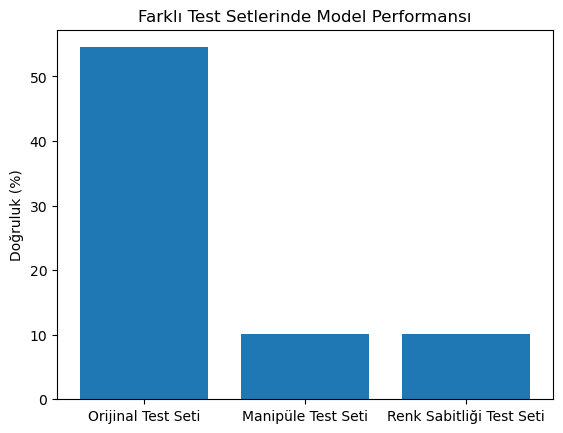

In [98]:
# Sonuçları birleştir
results = {
    "Orijinal Test Seti": history.history['val_accuracy'][-1] * 100,
    "Manipüle Test Seti": manipulated_results[1] * 100,
    "Renk Sabitliği Test Seti": corrected_results[1] * 100
}

# Sonuçları yazdır
for test_set, accuracy in results.items():
    print(f"{test_set} Doğruluk: {accuracy:.2f}%")

# Sonuçları görselleştir
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.ylabel('Doğruluk (%)')
plt.title('Farklı Test Setlerinde Model Performansı')
plt.show()


Bu kod, modelin farklı test setlerinde (orijinal, manipüle edilmiş ve renk sabitliği uygulanmış) gösterdiği doğruluk oranlarını karşılaştırır ve bir grafik yardımıyla görselleştirir.

Sonuçların Birleştirilmesi:

results Sözlüğü: 

-Modelin üç farklı test setindeki doğruluk oranlarını içerir:

-"Orijinal Test Seti": Eğitim sırasında kullanılan doğrulama setindeki doğruluk oranı. 

-history.history['val_accuracy'][-1]: Son epoch'taki doğrulama doğruluğu.

-"Manipüle Test Seti": Manipüle edilmiş test setindeki doğruluk oranı. 

-manipulated_results[1]: Manipüle edilmiş test seti doğruluğu.

-"Renk Sabitliği Test Seti": Renk sabitliği uygulanmış test setindeki doğruluk oranı.

-corrected_results[1]: Renk sabitliği uygulanmış test seti doğruluğu.

Sonuçların Yazdırılması:

for Döngüsü:

-Her test seti ve doğruluk oranı sırayla yazdırılır:

Performansın Görselleştirilmesi:

-plt.bar(): Test setlerinin isimlerini x ekseninde, doğruluk oranlarını y ekseninde gösterecek şekilde bir çubuk grafik çizer.

-Eksen Ayarları: plt.ylabel('Doğruluk (%)'): Y ekseninde doğruluk oranını yüzdelik olarak gösterir. 

-plt.title('Farklı Test Setlerinde Model Performansı'): Grafiğe başlık ekler.

Grafik Gösterimi:

-plt.show(): Çubuğu ekranda görüntüler.

1. Veri Artırma Stratejilerini Genişlet
Manipüle edilmiş görüntülerle çalışırken, daha çeşitli veri artırma stratejileri kullanılabilir:

Gürültü ekleme: Görüntülere rastgele gürültü ekleyerek modelin dayanıklılığını artırabiliriz.
Farklı ışıklandırma koşulları: Farklı parlaklık seviyelerinde görüntüler üreterek çeşitliliği artırabiliriz.
Renk uzayı dönüşümleri: RGB yerine HSV veya LAB gibi renk uzaylarını kullanarak eğitim verisini çeşitlendirebiliriz.

2. Daha İleri Model Kullanımı
CNN mimarisini iyileştirmek veya transfer öğrenme (Transfer Learning) kullanmayı düşünebiliriz:

Daha derin modeller: ResNet, VGG veya EfficientNet gibi önceden eğitilmiş modeller, bu tür problemler için daha iyi performans gösterebilir.
Model optimizasyonu: Hiperparametre optimizasyonu yaparak (örneğin öğrenme oranı, batch size) performansı artırabiliriz.

3. Manipülasyonlara Özel Eğitim
Modeli manipüle edilmiş görüntülerde daha iyi genelleme yapması için eğitebiliriz:

Manipüle edilmiş görüntüleri doğrudan eğitim setine dahil etmek.
Eğitim sırasında, manipüle edilmiş görüntülerin model performansına olan etkisini kontrol etmek için özel bir kayıp fonksiyonu kullanmak.

4. Performans İzleme ve İyileştirme
Performans metriklerini analiz et: Modelin yanlış sınıflandırdığı örnekleri incelemek, sınıflar arasında dengesizlik olup olmadığını anlamaya yardımcı olabilir.
Daha fazla eğitim verisi: Eğitim veri setinin boyutunu artırarak modelin daha fazla örnek görmesini sağlamak.